# Exercise3 Report(1)
download images and creating own dataset

### student
* student ID: 20161622
* name : 이예은


##  Getting set up

First of all, mounting with google drive for saving dataset. 

In [103]:
  !curl -s https://course.fast.ai/setup/colab | bash

  # Install neccessry packages 

Updating fastai...
Done.


In [104]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Colab Notebooks/exercise3'

# Mounting at google drive 
# And, set base directory to '/content/gdrive/My Drive/Colab Notebooks/'

Mounted at /content/gdrive


Import library for hanling image dataset in fastai

In [0]:
from fastai.vision import *

#import library for handling image data set

## Get urls by crawling in google



Download crawling image's urls by javascript code. You can use this code in 'Console' in Google images page.

```javascript
urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));

//crawling images this javascript code 
//you can get urls of images in google 
```

### Create directory and upload urls file into server

Set folder name to lables and file names having urls. 

In [0]:
folder = 'black'
file = 'urls_black.csv'

# set variable for directory name for black class
# and file name for csv file having urls to download image

In [0]:
folder = 'teddys'
file = 'urls_teddys.csv'
# set variable for directory name for teddys class
# and file name for csv file having urls to download image

In [0]:
folder = 'grizzly'
file = 'urls_grizzly.csv'

# set variable for directory name for grizzly class
# and file name for csv file having urls to download image

You will need to run this cell once per each category.

In [0]:
path = Path(base_dir+'/data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True) 
# set path for labeling
# and create directory

#base_dir is the path for my google drive

In [131]:
path.ls()
# print path

[PosixPath('/content/gdrive/My Drive/Colab Notebooks/exercise3/data/bears/urls_grizzly.csv'),
 PosixPath('/content/gdrive/My Drive/Colab Notebooks/exercise3/data/bears/urls_teddys.csv'),
 PosixPath('/content/gdrive/My Drive/Colab Notebooks/exercise3/data/bears/urls_black.csv'),
 PosixPath('/content/gdrive/My Drive/Colab Notebooks/exercise3/data/bears/black'),
 PosixPath('/content/gdrive/My Drive/Colab Notebooks/exercise3/data/bears/teddys'),
 PosixPath('/content/gdrive/My Drive/Colab Notebooks/exercise3/data/bears/grizzly'),
 PosixPath('/content/gdrive/My Drive/Colab Notebooks/exercise3/data/bears/models'),
 PosixPath('/content/gdrive/My Drive/Colab Notebooks/exercise3/data/bears/export.pkl')]

Finally, upload your urls file. You just need to press 'Upload' in your working directory and select your file, then click 'Upload' for each of the displayed files.
![github image](https://github.com/gomamon/mlp-course/blob/master/exercise3/capture/datas.PNG?raw=1)


## Download images

Download images by urls in crowled files

In [0]:
classes = ['teddys','grizzly','black']
# list of classes 

In [133]:
download_images(path/file, dest, max_pics=200)
#download images by urls in csv files

In [0]:

#download_images(path/file, dest, max_pics=20, max_workers=0)

# remove the comment try with `max_workers=0`  if you have a problems download, 

Then we can remove any images that can't be opened:

In [135]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

# verify_images : remove not verify images in class 

teddys


grizzly


black


## View data

In [0]:
np.random.seed(42) 
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

# set seed for split datas 

# In data bunches, 20% of images are used validation set. 
# And, data trasform and set size & normalizing

In [0]:
# If you already cleaned your data, run this cell instead of the one before
# np.random.seed(42)
# data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
#         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Good! Let's take a look at some of our pictures then.

In [49]:
data.classes
#print data classes

['black', 'grizzly', 'teddys']

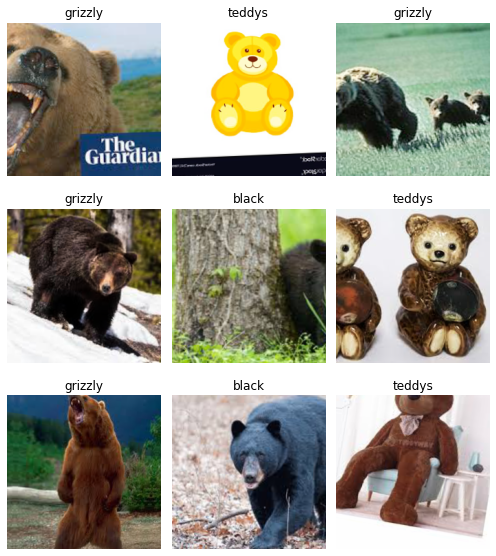

In [50]:
data.show_batch(rows=3, figsize=(7,8))
# show a batch of data

In [51]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

#show data classes, the number of classes , lenght of data train set, lenght of vlidation set,  

(['black', 'grizzly', 'teddys'], 3, 192, 48)

## Train model

In [52]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
#set learner of convolusion nueral network using resnet34 model

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [53]:
learn.fit_one_cycle(4)

# set epoch size 4 => train 4 times
# you can see the error_rate increasing

epoch,train_loss,valid_loss,error_rate,time
0,1.751812,0.102705,0.041667,00:04
1,1.039731,0.312783,0.083333,00:03
2,0.722335,0.441019,0.104167,00:03
3,0.560729,0.417265,0.104167,00:03


In [0]:
learn.save('stage-1')
# save parameters of the models to stage-1

In [0]:
learn.unfreeze()
# training the entire models

In [58]:
learn.lr_find()
# run learning rate finder 

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


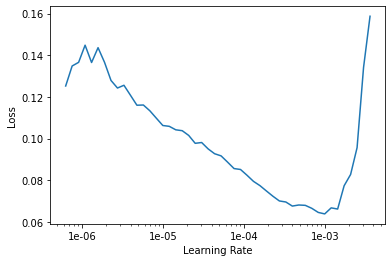

In [59]:
# If the plot is not showing try to give a start and end learning rate
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

# show graph about learning rate & loss graph

In [0]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))
# set interval of learning rate and training 2 cycles.

epoch,train_loss,valid_loss,error_rate
1,0.046916,0.072489,0.027027
2,0.041749,0.070343,0.027027


In [0]:
learn.save('stage-2')
# save parameters of the models to stage-2

## Interpretation

In [0]:
learn.load('stage-2');
# load the parameter of stage-2

In [62]:
interp = ClassificationInterpretation.from_learner(learn)

# interprete from the learner in stage-2

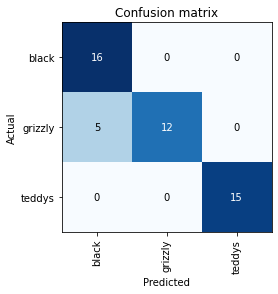

In [63]:
interp.plot_confusion_matrix()

# show confusion matrix 

## Cleaning Up

Cleanup unmatched data using top losses

In [0]:
from fastai.widgets import *

#import fastai.widgets for using ImageCleaner

Delete unmatched data and create new ImageDataBunch having right label.

In [0]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

# create a unspillted data bunch

In [0]:
# If you already cleaned your data using indexes from `from_toplosses`,
# run this cell instead of the one before to proceed with removing duplicates.
# Otherwise all the results of the previous step would be overwritten by
# the new run of `ImageCleaner`.

# db = (ImageList.from_csv(path, 'cleaned.csv', folder='.')
#                    .split_none()
#                    .label_from_df()
#                    .transform(get_transforms(), size=224)
#                    .databunch()
#      )

Then we create a new learner to use our new databunch with all the images.

In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

# set learner using resnet34 models to learn_cln
# and set parameters by stage-2 

In [68]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)
# get data set and index having top losses by learn_cln

In [0]:
# Don't run this in google colab or any other instances running jupyter lab.
# If you do run this on Jupyter Lab, you need to restart your runtime and
# runtime state including all local variables will be lost.

#ImageCleaner(ds, idxs, path)

# check images having top losses and removing unmatched images
# this code can't use in google drive 

'No images to show :)'

In [67]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [0]:
# ImageCleaner(ds, idxs, path, duplicates=True)

# this code can't use in google drive 

'No images to show :)'

## Putting your model in production

First thing first, let's export the content of our `Learner` object for production:

In [0]:
learn.export()
# export models of learner
# export.pkl

create a model file named 'export.pkl'.
![github image](https://github.com/gomamon/mlp-course/blob/master/exercise3/capture/models.PNG?raw=1)

Test the model on CPU

In [0]:
defaults.device = torch.device('cpu')

# change machine to cpu

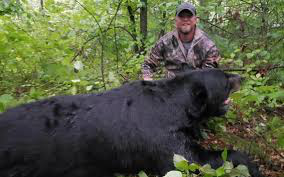

In [71]:
img = open_image(path/'black'/'00000021.jpg')
img

# open images in path/black/...jpg

We create our `Learner` in production enviromnent like this, just make sure that `path` contains the file 'export.pkl' from before.

In [0]:
learn = load_learner(path)
# load learners in path (export.pkl) 

In [76]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

# Using learning models, predict result of image and return class, index, outputs of result.
# show predicted class

# you can predicted result is black

Category black

So you might create a route something like this ([thanks](https://github.com/simonw/cougar-or-not) to Simon Willison for the structure of this code):

```python
@app.route("/classify-url", methods=["GET"])
async def classify_url(request):
    bytes = await get_bytes(request.query_params["url"])
    img = open_image(BytesIO(bytes))
    _,_,losses = learner.predict(img)
    return JSONResponse({
        "predictions": sorted(
            zip(cat_learner.data.classes, map(float, losses)),
            key=lambda p: p[1],
            reverse=True
        )
    })

    # You can use that code when I want to respond of result of the learner using the learning models
```

(This example is for the [Starlette](https://www.starlette.io/) web app toolkit.)

## Things that can go wrong

- The bad tune
  - Learning rate (too high/ low)
  - Number of epochs (too many/ few)

## LR
* Too high => get bad
* Too low => get better too slowly

### Learning rate (LR) too high

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

# set learner using resnet34 model

In [78]:
learn.fit_one_cycle(1, max_lr=0.5)

# Example of too high learning rate.
# Learn after setting learning rate 50%.

# You can see the high error_rate.

epoch,train_loss,valid_loss,error_rate,time
0,9.643909,10500873216.000000,0.666667,00:03


### Learning rate (LR) too low

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

# set learner using resnet34

Previously we had this result:

```
Total time: 00:57
epoch  train_loss  valid_loss  error_rate
1      1.030236    0.179226    0.028369    (00:14)
2      0.561508    0.055464    0.014184    (00:13)
3      0.396103    0.053801    0.014184    (00:13)
4      0.316883    0.050197    0.021277    (00:15)
```

In [83]:
learn.fit_one_cycle(5)

# using default learning rate

epoch,train_loss,valid_loss,error_rate,time
0,1.973117,1.419128,0.333333,00:03
1,1.094545,0.376794,0.104167,00:03
2,0.747049,0.255847,0.041667,00:03
3,0.574127,0.230752,0.041667,00:03
4,0.458536,0.233992,0.041667,00:03


In [85]:
learn.fit_one_cycle(5, max_lr=1e-5)
# If the learning rate is too low, error_rate get better too slowly comparing the above result.

epoch,train_loss,valid_loss,error_rate,time
0,0.085993,0.222012,0.041667,00:03
1,0.086656,0.221218,0.041667,00:03
2,0.086403,0.222169,0.041667,00:03
3,0.073703,0.219881,0.041667,00:03
4,0.076665,0.217541,0.041667,00:03


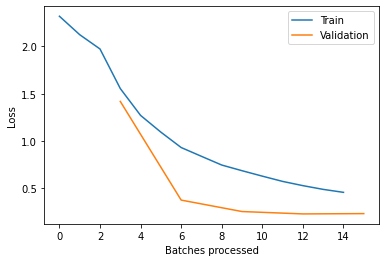

In [84]:
learn.recorder.plot_losses()

# You can see validation's loss is higher than  

## epoches
* Too many => over fitting
* Too few => not getting better

### Too few epochs

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate, pretrained=False)
# set cnn_learner using resnet34 model

In [87]:
learn.fit_one_cycle(1)
# leanrn only on cycle (epoch size is 1)

# If epoch size is too low error_rate not get lower.  

epoch,train_loss,valid_loss,error_rate,time
0,2.423586,40.160206,0.687500,00:03


### Too many epochs

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.9, bs=16, 
        ds_tfms=get_transforms(do_flip=False, max_rotate=0, max_zoom=1, max_lighting=0, max_warp=0
                              ),size=224, num_workers=4).normalize(imagenet_stats)
# create a data bunch

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate, ps=0, wd=0)
learn.unfreeze()

# set learner using resnet 50
# trainning the entire models

In [101]:
learn.fit_one_cycle(40, slice(1e-6,1e-4))

# if epochs is too high error_rate not better because of overfitting

epoch,train_loss,valid_loss,error_rate,time
0,1.761552,1.116921,0.537037,00:05
1,1.586060,1.065254,0.509259,00:02
2,1.536168,0.994045,0.453704,00:02
3,1.460444,0.929215,0.402778,00:02
4,1.309724,0.849703,0.365741,00:02
5,1.249515,0.763263,0.314815,00:02
6,1.148464,0.678101,0.268519,00:02
7,1.031292,0.602684,0.236111,00:02
8,0.933180,0.544075,0.226852,00:02
9,0.855257,0.488207,0.212963,00:02
